In [34]:
import pandas as pd
from importlib import reload
import sklearn as sk

pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
pd.set_option('display.max_rows', 999)
pd.set_option('display.min_rows', 999)

%config IPCompleter.use_jedi = False

In [35]:
df = pd.read_csv("/Users/dave/src/CSE6242/Data/apm_demo_faru_grad_with_counties_clean.csv")
df.head()

,Unnamed: 0,district_cd,cohortye,total,gr_droppedout,gr_graduated,gr_iep,gr_ged,gr_stillenrolled,outcome_yrs,srcyear,subgroup,_name_,gr_local_cnt,year,district_from_df1,num_asian,num_black,num_hisp,num_am_ind,num_white,num_female,num_male,num_lep,num_free_lunch,num_reduced_lunch,num_multi,num_swd,num_ecdis,num_ell,district_from_faru,ufb,staid,star,totstat,lrev,fedrev,totrev,state_aid_total_revenues,star_total_revenues,state_revenues_total_revenues,bded,cadm,tsal,pps,cds,boc,tui1,tui2,ois,oiexp,cser,opmt,tchr,heal,oeb,total_fringe_benefits,ound,oth,subtot,trans,dsp,dsi,texp,total_unexpended_surplus_funds_t,revenue_expenditures,var,dcaadm,rev_pupil,exp_pupil,av_twpu,inc_twpu,pwr,apwr,cwr,instructional_salaries,instructional_fringe_benefits,ins_fb,adjusted_expenditures__subtotal,ie1,ie1_total,ie2_instructional_expenditures_i,ie2,ie3_instructional_expenditures_i,ie3_adj_exp,loc_eff_rate,district_code,aggregation_name,county_name,county_code
0,0,10100,2000,618,83.0,407,21.0,57.0,50.0,5.0,200506,1.0,NaN,NaN,2005,10100,269.0,5952.0,918.0,21.0,1884.0,NaN,NaN,300.0,5505.0,970.0,0.0,NaN,NaN,NaN,10100,5680290,54570126,10225351,64795477,98285968,16659701,179741146,0.303604,0.056889,0.360493,490999,2118256,54023846,5251097,4501195,3728010,188593,6610228,16305802,19303934,1199428,11203660,5165294,14257866,14441655,33864815,4053261,564400,163407524,5972182,7669294,5365766,182414766,0.031139,-2673620,-0.014657,10559,17022.553840,17275.761530,244659,93587,0.706290,0.789764,0.748027,83809950,3.117730e+07,0.170914,162986931,109912705.0,0.602543,1.410900e+08,0.773457,1.409014e+08,0.864495,26.51,10100.0,ALBANY CITY SCHOOL DISTRICT,ALBANY,1.0
1,1,10100,2001,579,100.0,384,40.0,27.0,28.0,5.0,200706,1.0,NaN,NaN,2007,10100,360.0,5281.0,940.0,24.0,1654.0,NaN,NaN,382.0,3992.0,789.0,77.0,NaN,NaN,NaN,10100,13358464,74675977,10131780,84807757,105784891,13677063,204269711,0.365575,0.049600,0.415175,385910,2055778,55114952,5988074,4266372,4793593,541340,7253219,17557992,26611527,602434,11451223,5439024,16966397,11086334,33491755,3264726,989999,174368894,6153173,7356028,6733231,194611326,0.068642,9658385,0.049629,10430,19584.823682,18658.804027,268181,99117,0.628353,0.725600,0.676977,87720983,3.087779e+07,0.158664,173595554,122127069.0,0.627543,1.530049e+08,0.786207,1.524635e+08,0.878269,21.95,10100.0,ALBANY CITY SCHOOL DISTRICT,ALBANY,1.0
2,2,10100,2001,579,84.0,327,30.0,26.0,112.0,4.0,200706,1.0,NaN,NaN,2007,10100,360.0,5281.0,940.0,24.0,1654.0,NaN,NaN,382.0,3992.0,789.0,77.0,NaN,NaN,NaN,10100,13358464,74675977,10131780,84807757,105784891,13677063,204269711,0.365575,0.049600,0.415175,385910,2055778,55114952,5988074,4266372,4793593,541340,7253219,17557992,26611527,602434,11451223,5439024,16966397,11086334,33491755,3264726,989999,174368894,6153173,7356028,6733231,194611326,0.068642,9658385,0.049629,10430,19584.823682,18658.804027,268181,99117,0.628353,0.725600,0.676977,87720983,3.087779e+07,0.158664,173595554,122127069.0,0.627543,1.530049e+08,0.786207,1.524635e+08,0.878269,21.95,10100.0,ALBANY CITY SCHOOL DISTRICT,ALBANY,1.0
3,3,10100,2001,579,103.0,397,41.0,29.0,9.0,6.0,200706,1.0,NaN,NaN,2007,10100,360.0,5281.0,940.0,24.0,1654.0,NaN,NaN,382.0,3992.0,789.0,77.0,NaN,NaN,NaN,10100,13358464,74675977,10131780,84807757,105784891,13677063,204269711,0.365575,0.049600,0.415175,385910,2055778,55114952,5988074,4266372,4793593,541340,7253219,17557992,26611527,602434,11451223,5439024,16966397,11086334,33491755,3264726,989999,174368894,6153173,7356028,6733231,194611326,0.068642,9658385,0.049629,10430,19584.823682,18658.804027,268181,99117,0.628353,0.725600,0.676977,87720983,3.087779e+07,0.158664,173595554,122127069.0,0.627543,1.530049e+08,0.786207,1.524635e+08,0.878269,21.95,10100.0,ALBANY CITY SCHOOL DISTRICT,ALBANY,1.0
4,4,10100,2002,602,143.0,389,22.0,15.0,33.0,5.0,200806,1.0,NaN,NaN,2008,10100,382.0,4894.0,908.0,27.0,1592.0,NaN,NaN,405.0,4660.0,757.0,96.0,NaN,NaN,NaN,10100,11443927,88986207,9683819,98670026,108582740,12186499,219439265,0.405516,0.044130,0.449646,32561

In [36]:
df.county_name.value_counts()

CHAUTAUQUA     732
BROOME         492
ALLEGANY       492
CATTARAUGUS    492
ALBANY         456
CHENANGO       328
CLINTON        328
CAYUGA         287
CHEMUNG        123
Name: county_name, dtype: int64

(26298, 90)

<AxesSubplot:xlabel='grad_ratio', ylabel='county_name'>

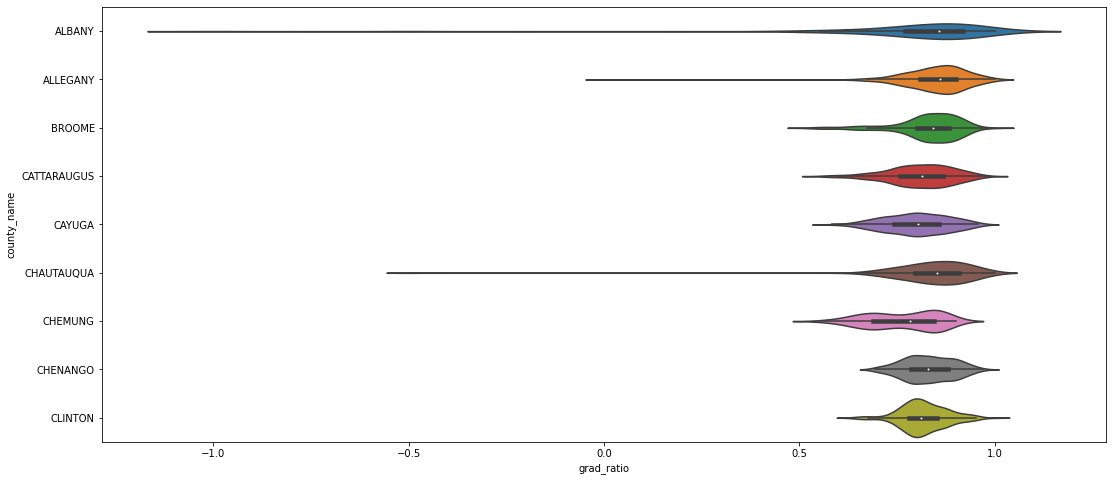

In [37]:
display(df.shape)
import seaborn as sns
plt.figure(figsize=(18,8))
df['grad_ratio'] = df.gr_graduated / df.total

sns.violinplot(df.grad_ratio, df.county_name)

In [38]:
from sklearn.linear_model import LinearRegression
X = df.num_free_lunch
y = df.gr_droppedout
regr = LinearRegression(
    fit_intercept = True, normalize = True, copy_X = True, n_jobs = 2
).fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[5505. 3992. 3992. ...  344.  344.  344.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [40]:
df.tail()

,Unnamed: 0,district_cd,cohortye,total,gr_droppedout,gr_graduated,gr_iep,gr_ged,gr_stillenrolled,outcome_yrs,srcyear,subgroup,_name_,gr_local_cnt,year,district_from_df1,num_asian,num_black,num_hisp,num_am_ind,num_white,num_female,num_male,num_lep,num_free_lunch,num_reduced_lunch,num_multi,num_swd,num_ecdis,num_ell,district_from_faru,ufb,staid,star,totstat,lrev,fedrev,totrev,state_aid_total_revenues,star_total_revenues,state_revenues_total_revenues,bded,cadm,tsal,pps,cds,boc,tui1,tui2,ois,oiexp,cser,opmt,tchr,heal,oeb,total_fringe_benefits,ound,oth,subtot,trans,dsp,dsi,texp,total_unexpended_surplus_funds_t,revenue_expenditures,var,dcaadm,rev_pupil,exp_pupil,av_twpu,inc_twpu,pwr,apwr,cwr,instructional_salaries,instructional_fringe_benefits,ins_fb,adjusted_expenditures__subtotal,ie1,ie1_total,ie2_instructional_expenditures_i,ie2,ie3_instructional_expenditures_i,ie3_adj_exp,loc_eff_rate,district_code,aggregation_name,county_name,county_code,grad_ratio
26293,26293,680801,2010,61,4.0,52,0.0,2.0,3.0,6.0,201606,1.0,NaN,NaN,2016,680801,1.0,6.0,15.0,1.0,614.0,292.0,358.0,0.0,366.0,56.0,13.0,130.0,429.0,0.0,680801,676077,11052370,623926,11676296,4915519,894676,17486491,0.632052,0.035680,0.667732,276334,454695,4494747,384459,214608,995961,336005,0,1500275,1218907,7777,702834,600424,2463438,1044672,4108534,352207,65000,15112343,946162,1135000,391712,17585217,0.038446,-98726,-0.005614,709,24663.598025,24802.844852,454696,92977,0.812973,0.494033,0.653503,7590050,3559733.45,0.202428,14776338,9144962.0,0.520037,12704695.45,0.722465,12368690.45,0.837061,10.59,NaN,NaN,NaN,NaN,0.852459
26294,26294,680801,2012,72,9.0,55,2.0,0.0,6.0,4.0,201606,1.0,NaN,NaN,2016,680801,1.0,6.0,15.0,1.0,614.0,292.0,358.0,0.0,366.0,56.0,13.0,130.0,429.0,0.0,680801,676077,11052370,623926,11676296,4915519,894676,17486491,0.632052,0.035680,0.667732,276334,454695,4494747,384459,214608,995961,336005,0,1500275,1218907,7777,702834,600424,2463438,1044672,4108534,352207,65000,15112343,946162,1135000,391712,17585217,0.038446,-98726,-0.005614,709,24663.598025,24802.844852,454696,92977,0.812973,0.494033,0.653503,7590050,3559733.45,0.202428,14776338,9144962.0,0.520037,12704695.45,0.722465,12368690.45,0.837061,10.59,NaN,NaN,NaN,NaN,0.763889
26295,26295,680801,2011,73,3.0,67,1.0,1.0,1.0,6.0,201706,1.0,NaN,NaN,2017,680801,1.0,3.0,19.0,1.0,651.0,320.0,367.0,0.0,344.0,51.0,12.0,148.0,437.0,NaN,680801,2628235,10853262,610903,11464165,5093799,1060275,17618239,0.616024,0.034674,0.650699,131945,430599,4256359,399807,215428,1219069,32985,0,1459766,983787,5728,713974,414376,2428437,1081349,3924162,312892,57039,14143540,1054424,1210000,333900,16741864,0.156986,876375,0.052346,689,25571.000000,24299.000000,485202,105298,0.855132,0.523871,0.689501,7550429,3427895.00,0.204750,14110555,8567201.0,0.511723,11995096.00,0.716473,11962111.00,0.847742,10.62,NaN,NaN,NaN,NaN,0.917808
26296,26296,680801,2012,73,11.0,57,0.0,0.0,5.0,5.0,201706,1.0,NaN,NaN,2017,680801,1.0,3.0,19.0,1.0,651.0,320.0,367.0,0.0,344.0,51.0,12.0,148.0,437.0,NaN,680801,2628235,10853262,610903,11464165,5093799,1060275,17618239,0.616024,0.034674,0.650699,131945,430599,4256359,399807,215428,1219069,32985,0,1459766,983787,5728,713974,414376,2428437,1081349,3924162,312892,57039,14143540,1054424,1210000,333900,16741864,0.156986,876375,0.052346,689,25571.000000,24299.000000,485202,105298,0.855132,0.523871,0.689501,7550429,3427895.00,0.204750,14110555,8567201.0,0.511723,11995096.00,0.716473,11962111.00,0.847742,10.62,NaN,NaN,NaN,NaN,0.780822
26297,26297,680801,2013,61,11.0,43,3.0,0.0,4.0,4.0,201706,1.0,NaN,NaN,2017,680801,1.0,3.0,19.0,1.0,651.0,320.0,367.0,0.0,344.0,51.0,12.0,148.0,437.0,NaN,680801,2628235,10853262,610903,11464165,5093799,1060275,17618239,0.616024,0.034674,0.650699,131945,430599,4256359,399807,215428,1219069,32985,0,1459766,983787,5728,713974,414376,2428437,1081349,3924162,312892,57039,14143540,1054424,1210000,333900,16741864,0.156986,876375,0.052346,689,25571.000000,24299.000000,485202,105298,0.855132,0.523871,0.689501,7550

In [ ]:

df_grad
